In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#this is a logistic regression model
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv


In [30]:
data=pd.read_csv("../input//kaggle/input/credit-risk-analysis-for-extending-bank-loans.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../input//kaggle/input/credit-risk-analysis-for-extending-bank-loans.csv'

In [9]:
data=pd.read_csv("/kaggle/input/credit-risk-analysis-for-extending-bank-loans")

IsADirectoryError: [Errno 21] Is a directory: '/kaggle/input/credit-risk-analysis-for-extending-bank-loans'

In [31]:
data=pd.read_csv("/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv")
maindata=pd.read_csv("/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv")

In [32]:
data.head(1)  

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0


In [33]:
data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [34]:
data.columns.size

9

In [35]:
data=data.dropna()

In [36]:
data.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [37]:
data=data.drop(["default"],axis=1)

In [38]:
data.columns.size

8

<Axes: xlabel='age', ylabel='income'>

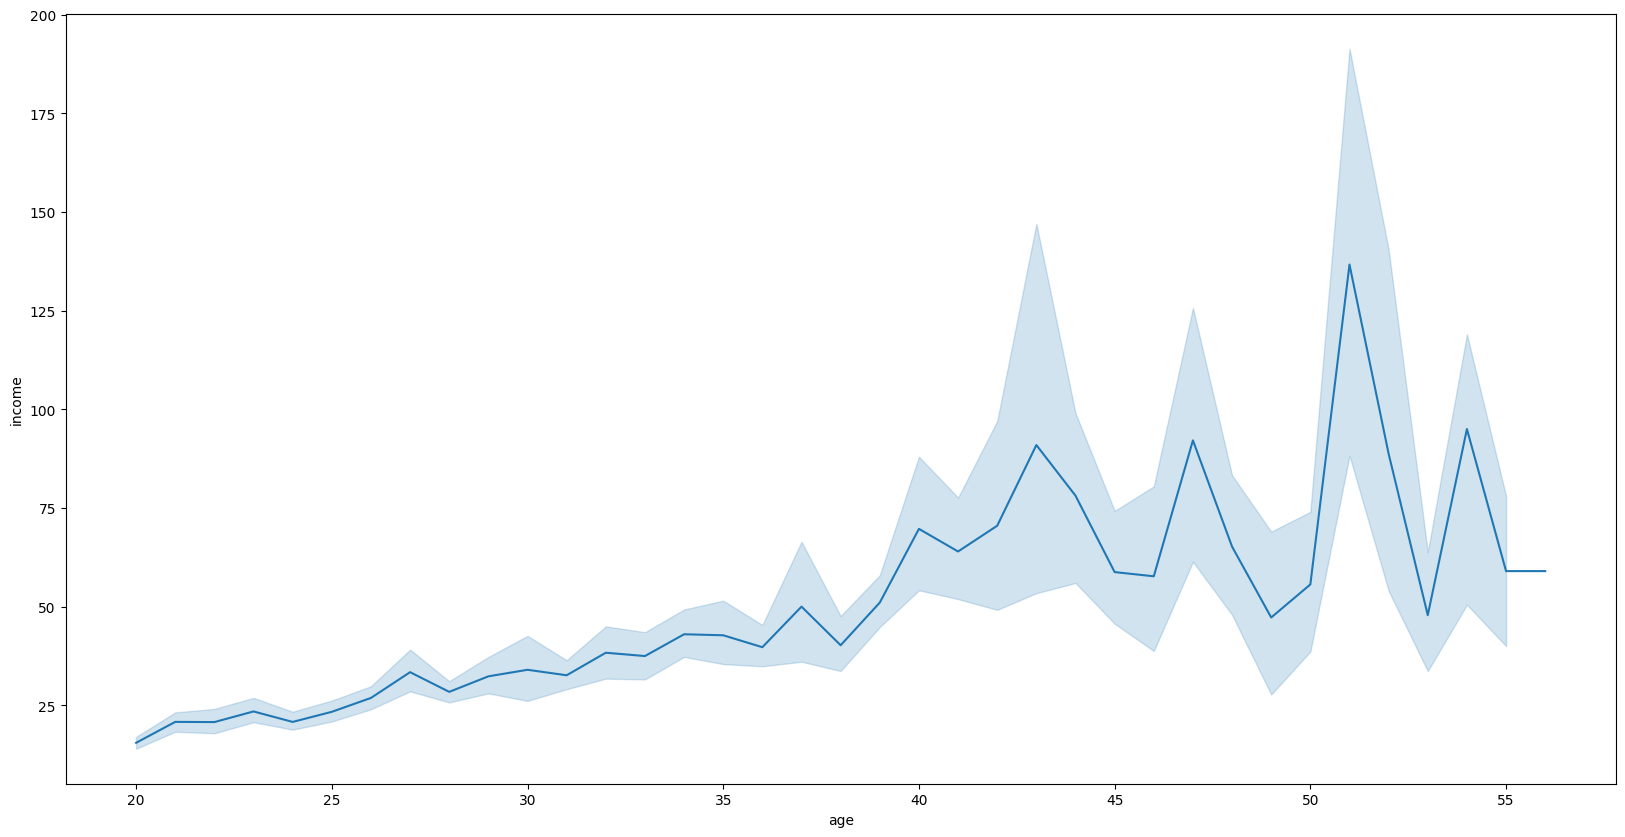

In [39]:
#ploting some graphs between age and income
fig,ax=plt.subplots(figsize=(20,10))
sns.lineplot(x="age",y="income",data=data,ax=ax)

<Axes: xlabel='age', ylabel='debtinc'>

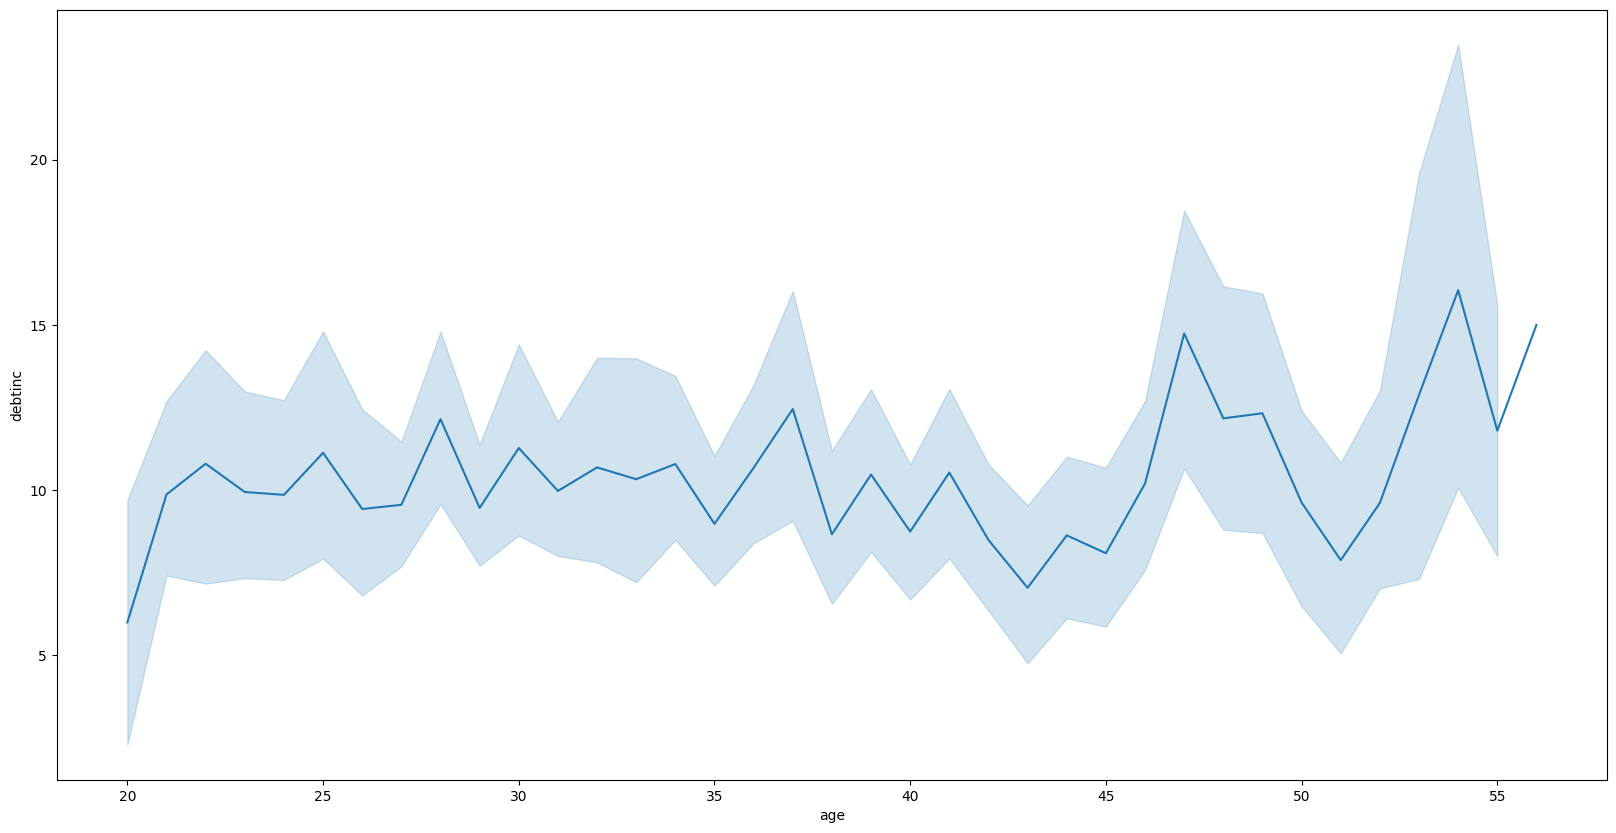

In [40]:
#plotting the graph between income and the debt
fig,ax=plt.subplots(figsize=(20,10))
sns.lineplot(x="age",y="debtinc",data=data,ax=ax)

In [41]:
maindata.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [42]:
#preparing the model for train test split
maindata=maindata.dropna()
x=maindata.drop(["default"],axis=1)
y=maindata["default"]

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1000)

In [44]:
#Scalling the values in the main function 
scaler=StandardScaler()

In [45]:
x_train_scaled=scaler.fit_transform(xtrain)
x_test_scaled=scaler.fit_transform(xtest)

Creating the model


****

In [46]:
rfc=RandomForestClassifier(n_estimators=200)

In [47]:
rfc.fit(x_train_scaled,ytrain)   

RandomForestClassifier(n_estimators=200)

In [48]:
y_pred = rfc.predict(xtest)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7285714285714285


In [50]:
rfc2=cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()

0.8

In [53]:
from sklearn.svm import SVC  
sv = SVC(kernel='linear') 

In [54]:
sv.fit(xtrain,ytrain)

SVC(kernel='linear')

In [55]:
sv.score(xtest,ytest)

0.8071428571428572

In [56]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7928571428571428

<Axes: >

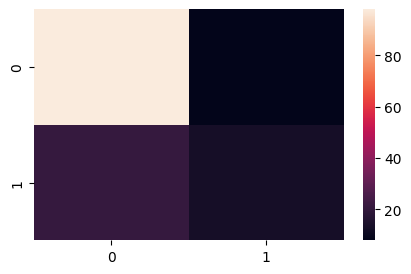

In [59]:
yp=lr.predict(xtest)
c=confusion_matrix(ytest,yp)
fig,ax=plt.subplots(figsize=(5,3))
sns.heatmap(c,ax=ax)